# Exploring your data
So you've just got a brand new dataset and are itching to start exploring it. But where do you begin, and how can you be sure your dataset is clean? This chapter will introduce you to the world of data cleaning in Python! You'll learn how to explore your data with an eye for diagnosing issues such as outliers, missing values, and duplicate rows.

# Diagnose data for cleaning

## Cleaning data
- Prepare data for analysis
- Data almost never comes in clean
- Diagnose your data for problems

## Common data problems
- Inconsistent column names
- Missing data
- Outliers
- Duplicate rows
- Untidy
- Need to process columns
- Column types can signal unexpected data value

## Load your data

In [1]:
import pandas as pd
df = pd.read_csv('literacy_birth_rate.csv')

## Visually inspect

In [18]:
df.head(5)

,continent,country,female literacy,fertility,population
0,ASI,Chine,90.5,1.769,1.324655e+09
1,ASI,Inde,50.8,2.682,1.139965e+09
2,NAM,USA,99.0,2.077,3.040600e+08
3,ASI,Indonésie,88.8,2.132,2.273451e+08
4,LAT,Brésil,90.2,1.827,NaN


In [19]:
df.tail(5)

,continent,country,female literacy,fertility,population
159,AF,Sao Tomé-et-Principe,83.3,3.718,1.601740e+05
160,LAT,Aruba,98.0,1.732,1.054550e+05
161,ASI,Tonga,99.1,3.928,1.035660e+05
162,OCE,Australia,96.0,1.930,2.313000e+09
163,OCE,Sweden,90.2,1.827,NaN


In [20]:
df.columns

Index(['continent', 'country', 'female literacy', 'fertility', 'population'], dtype='object')

In [21]:
df.shape

(164, 5)

### Visually inspect

- `object`: generic type stored as a string
- `int`: numeric type no decimals
- `float`: numeric type are decimals

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 5 columns):
continent          164 non-null object
country            164 non-null object
female literacy    164 non-null float64
fertility          164 non-null float64
population         162 non-null float64
dtypes: float64(3), object(2)
memory usage: 6.5+ KB


# Let’s practice!

In [22]:
# Import pandas
import pandas as pd

# Read the file into a DataFrame: df
df = pd.read_csv('dob_job_application_filings_subset.csv')

# Print the head of df
print(df.head())

# Print the tail of df
print(df.tail())

# Print the shape of df
print(df.shape)

# Print the columns of df
print(df.columns)

       Job #  Doc #        Borough       House #  \
0  121577873      2      MANHATTAN  386            
1  520129502      1  STATEN ISLAND  107            
2  121601560      1      MANHATTAN  63             
3  121601203      1      MANHATTAN  48             
4  121601338      1      MANHATTAN  45             

                        Street Name  Block  Lot    Bin # Job Type Job Status  \
0  PARK AVENUE SOUTH                   857   38  1016890       A2          D   
1  KNOX PLACE                          342    1  5161350       A3          A   
2  WEST 131 STREET                    1729    9  1053831       A2          Q   
3  WEST 25TH STREET                    826   69  1015610       A2          D   
4  WEST 29 STREET                      831    7  1015754       A3          D   

            ...                         Owner's Last Name  \
0           ...            MIGLIORE                         
1           ...            BLUMENBERG                       
2           ...        

/home/salas/miniconda3/envs/datacamp/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
df_subset = df[['Job #','Doc #', 'Borough', 'Initial Cost', 'Total Est. Fee','Existing Zoning Sqft',
                'Proposed Zoning Sqft', 'Enlargement SQ Footage', 'Street Frontage',
               'ExistingNo. of Stories','ExistingNo. of Stories',
               'Existing Height', 'Proposed Height']]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 13 columns):
Job #                     12846 non-null int64
Doc #                     12846 non-null int64
Borough                   12846 non-null object
Initial Cost              12846 non-null object
Total Est. Fee            12846 non-null object
Existing Zoning Sqft      12846 non-null int64
Proposed Zoning Sqft      12846 non-null int64
Enlargement SQ Footage    12846 non-null int64
Street Frontage           12846 non-null int64
ExistingNo. of Stories    12846 non-null int64
ExistingNo. of Stories    12846 non-null int64
Existing Height           12846 non-null int64
Proposed Height           12846 non-null int64
dtypes: int64(10), object(3)
memory usage: 1.3+ MB


In [25]:
# Print the info of df
print(df.info())

# Print the info of df_subset
print(df_subset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 82 columns):
Job #                           12846 non-null int64
Doc #                           12846 non-null int64
Borough                         12846 non-null object
House #                         12846 non-null object
Street Name                     12846 non-null object
Block                           12846 non-null int64
Lot                             12846 non-null int64
Bin #                           12846 non-null int64
Job Type                        12846 non-null object
Job Status                      12846 non-null object
Job Status Descrp               12846 non-null object
Latest Action Date              12846 non-null object
Building Type                   12846 non-null object
Community - Board               12846 non-null object
Cluster                         0 non-null float64
Landmarked                      2067 non-null object
Adult Estab                     1 no

# Exploratory data analysis

## Frequency counts

- Count the number of unique values in our data

## Data type of each column


In [26]:
df = pd.read_csv('literacy_birth_rate.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 5 columns):
continent          164 non-null object
country            164 non-null object
female literacy    164 non-null float64
fertility          164 non-null float64
population         162 non-null float64
dtypes: float64(3), object(2)
memory usage: 6.5+ KB


## Frequency counts: continent

- select the col we want to perform a frequency count on

If the col name does not contain any special chars, spaces and not a name of a function, we can select it using the .dot notation
`df.continent..`

- .value_counts(dropna=False) will count the values including Nan ex missing values
.value_counts will print out the coutns for each unique value of a column in descending order.


Can be use either dot notation or bracket way.

- `df.continent.value_counts(dropna=False)`
- `df['continent'].value_counts(dropna=False)`

In [8]:
df.continent.value_counts(dropna=False) 

AF     49
ASI    47
EUR    36
LAT    24
OCE     6
NAM     2
Name: continent, dtype: int64

In [9]:
df['continent'].value_counts(dropna=False)

AF     49
ASI    47
EUR    36
LAT    24
OCE     6
NAM     2
Name: continent, dtype: int64

## Frequency counts: country


In [10]:
df.country.value_counts(dropna=False).head()

Sweden                                  2
Rép. populaire démocratique de Corée    1
Malaisie                                1
Chili                                   1
Cameroun                                1
Name: country, dtype: int64

## Frequency counts: fertility


In [11]:
df.fertility.value_counts(dropna=False).head() 

1.841    2
1.436    2
3.371    2
1.393    2
1.854    2
Name: fertility, dtype: int64

## Frequency counts: population


In [12]:
df.population.value_counts(dropna=False).head() 


NaN            2
 5667325.0     1
 31656865.0    1
 10622413.0    1
 12705736.0    1
Name: population, dtype: int64

## Summary statistics

- Numeric columns
- Outliers
    - Considerably higher or lower
    - Require further investigation

## Summary statistics: Numeric data


In [27]:
df.describe()

,female literacy,fertility,population
count,164.000000,164.000000,1.620000e+02
mean,80.265854,2.866476,5.377985e+07
std,22.957409,1.423089,2.272193e+08
min,12.600000,0.966000,1.035660e+05
25%,66.675000,1.825750,3.368292e+06
50%,90.200000,2.361000,9.707404e+06
75%,98.500000,3.874750,2.882991e+07
max,100.000000,7.069000,2.313000e+09


---
# Let’s practice!

In [29]:
# Read the file into a DataFrame: df
df = pd.read_csv('dob_job_application_filings_subset.csv')
# Print the value counts for 'Borough'
print(df['Borough'].value_counts(dropna=False))

# Print the value_counts for 'State'
print(df['State'].value_counts(dropna=False))

# Print the value counts for 'Site Fill'
print(df['Site Fill'].value_counts(dropna=False))

MANHATTAN        6310
BROOKLYN         2866
QUEENS           2121
BRONX             974
STATEN ISLAND     575
Name: Borough, dtype: int64
NY    12391
NJ      241
PA       38
CA       20
OH       19
FL       17
IL       17
CT       16
TX       13
TN       10
DC        7
MD        7
KS        6
MA        6
GA        6
VA        5
CO        4
AZ        3
WI        3
MN        3
SC        3
RI        2
NC        2
UT        2
MI        1
VT        1
WA        1
IN        1
NM        1
Name: State, dtype: int64
NOT APPLICABLE                              7806
NaN                                         4205
ON-SITE                                      519
OFF-SITE                                     186
USE UNDER 300 CU.YD                          130
Name: Site Fill, dtype: int64


/home/salas/miniconda3/envs/datacamp/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


---
# Visual exploratory data analysis

## Data visualization
- Great way to spot outliers and obvious errors
- More than just looking for pa!erns
- Plan data cleaning steps

## Summary statistics


In [38]:
df = pd.read_csv('literacy_birth_rate.csv')

df.describe()

,female literacy,fertility,population
count,164.000000,164.000000,1.620000e+02
mean,80.265854,2.866476,5.377985e+07
std,22.957409,1.423089,2.272193e+08
min,12.600000,0.966000,1.035660e+05
25%,66.675000,1.825750,3.368292e+06
50%,90.200000,2.361000,9.707404e+06
75%,98.500000,3.874750,2.882991e+07
max,100.000000,7.069000,2.313000e+09


## Bar plots and histograms
- Bar plots for discrete data counts
- Histograms for continuous data counts
- Look at frequencies

## Histogram

- take the dataframe and column of intrest
- call the plot method
- pass 'hist' into the method to have pandas create a histogram
- make sure matplotlib is loaded before 

x- axis show the range of vlaue sthat are counted, y-axis how many observatiosn in our data  are ina aparticular range of values.

Histogram shows 2 observations between 1 - 1.5 billion, and one more thant 2 billion.

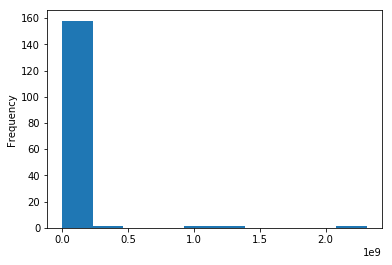

In [39]:
import matplotlib.pyplot as plt 

df.population.plot('hist')
plt.show()

## Identifying the error

- slice data  to look for poins hwre the pop is greated thatn 1 billion ppl.

- we use bracket notation to slice our data, and inside we specify the condition, population greater thatn 1 billion
```python
df[df.population > 1000000000]

	continent	country	female literacy	fertility	population
0	ASI	    Chine	    90.5	1.769	            1.324655e+09
1	ASI    	Inde	    50.8	2.682	             1.139965e+09
162	OCE	    Australia	96.0	1.930	          2.313000e+09

```


- Not all outliers are bad data points
- Some can be an error, but others are valid values


In [16]:
df[df.population > 1000000000]

,continent,country,female literacy,fertility,population
0,ASI,Chine,90.5,1.769,1.324655e+09
1,ASI,Inde,50.8,2.682,1.139965e+09
162,OCE,Australia,96.0,1.930,2.313000e+09


## Box plots

- Visualize basic summary statistics
    - Outliers
    - Min/max
    - 25th, 50th, 75th percentiles

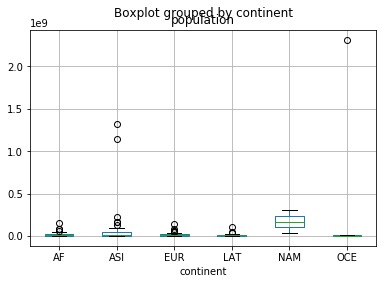

In [17]:
df.boxplot(column='population', by='continent')
plt.show()

## Scatter plots
- Relationship between 2 numeric variables
- Flag potentially bad data
    - Errors not found by looking at 1 variable

---
# Let’s practice!


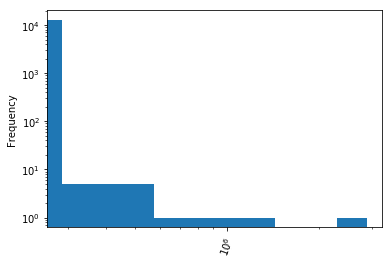

In [40]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Plot the histogram
df_subset['Existing Zoning Sqft'].plot(kind='hist', rot=70, logx=True, logy=True)

# Display the histogram
plt.show()

In [41]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12846 entries, 0 to 12845
Data columns (total 13 columns):
Job #                     12846 non-null int64
Doc #                     12846 non-null int64
Borough                   12846 non-null object
Initial Cost              12846 non-null object
Total Est. Fee            12846 non-null object
Existing Zoning Sqft      12846 non-null int64
Proposed Zoning Sqft      12846 non-null int64
Enlargement SQ Footage    12846 non-null int64
Street Frontage           12846 non-null int64
ExistingNo. of Stories    12846 non-null int64
ExistingNo. of Stories    12846 non-null int64
Existing Height           12846 non-null int64
Proposed Height           12846 non-null int64
dtypes: int64(10), object(3)
memory usage: 1.3+ MB


In [43]:
# # Import necessary modules
# import pandas as pd
# import matplotlib.pyplot as plt

# # Create the boxplot
# df_subset.boxplot(column='Initial Cost', by='Borough', rot=90)

# # Display the plot
# plt.show()

In [44]:
# # Import necessary modules
# import pandas as pd
# import matplotlib.pyplot as plt

# # Create and display the first scatter plot
# df.plot(kind='scatter', x='initial_cost', y='total_est_fee', rot=70)
# plt.show()

# # Create and display the second scatter plot
# df_subset.plot(kind='scatter', x='initial_cost', y='total_est_fee', rot=70)

# plt.show()